In [7]:
!date

Tue Nov 28 14:56:58 UTC 2023


# Quality of selfies
Selfies go through a quality check in backend. However, it occured that now and then we get selfies with cut off faces. This notebook should explore how to improve the quality of the selfies in specifically that case.

In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import os
from pathlib import Path
import cv2

In [2]:
beiersdorf_colours ={
    'New Beiersdorf Blue': '#0033A0',
    'Deep Ocean': '#00447B',
    'Waterfall': '#005A8D',
    'Sky Blue': '#5BC2E7',
    'White': '#FFFFFF',
    'Graphit': '#7D7D7D',
    'Stone': '#AFAFAF',
    'Linen': '#F5ECEC',
    'Oyster': '#EDEDED',
    'Pearl': '#F7F7F7',
    'Bright Yellow': '#FFD100',
    'Soft Yellow': '#FFE845',
    'Dark Night Blue': '#00008B',
    'Dark Gray': '#333333', 
    'Red': '#ED3340',
    'Green': '#007A33', 
}

#### Sample random selfies

In [3]:
selfies_dir = '/home/azureuser/cloudfiles/code/Users/Franziska.Ahrens/git/digital-twins/src/data/selfies'

In [ ]:
# get list of all user paths
[user for user in Path(selfies_dir).glob("*")]
#get sample of user_ids and their latest selfie
user_ids = np.array([user for user in Path(selfies_dir).glob("*")], dtype=str)
# sample of 10
sampled_user_ids = np.random.choice(user_ids, size=10, replace=False, p=None)
sampled_user_ids

In [7]:
# get latest selfie of sampled users
latest_selfie_paths_sample = [str(sorted(Path(user).glob("*.jpg"))[-1]) for user in sampled_user_ids]

In [29]:
latest_selfie_paths_sample[0]

'/home/azureuser/cloudfiles/code/Users/Franziska.Ahrens/git/digital-twins/src/data/selfies/15179/2021-05-31_15179_00000277-0016-2243-8786-F8F005C1A577.jpg'

#### load damaged selfies

In [11]:
df_missing_landmarks = pd.read_csv('valid_selfies_missing_landmarks.csv')
selfie_paths_missing_landmarks = df_missing_landmarks.selfie_path.values

In [4]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retineface', 'mediapipe']

## Idea 1: Face Detection with deepface:
Use deepface or another face detection library to identify faces in the selfies.
Adjust the parameters to fine-tune the sensitivity of the face detection.

In [ ]:
selfie_paths = selfie_paths_missing_landmarks

In [13]:
selfie = DeepFace.detectFace(selfie_paths[0])
plt.imshow(selfie)
plt.show

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [50]:
plt.imread(latest_selfie_paths_sample[3])

UnidentifiedImageError: cannot identify image file '/home/azureuser/cloudfiles/code/Users/Franziska.Ahrens/git/digital-twins/src/data/selfies/18523/2023-05-01_18523_00000918-0016-8292-4562-F8F005C20319.jpg'

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 164ms/step
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


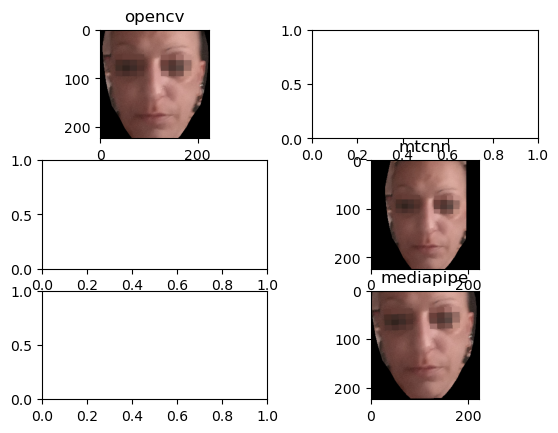

In [49]:
fig, axs = plt.subplots(3,2)
axs =axs.flatten()
for i, b in enumerate(backends):
    try:
        face = DeepFace.detectFace(
            latest_selfie_paths_sample[6], target_size=(224,224), detector_backend = b
        )
        axs[i].imshow(face)
        axs[i].set_title(b)
    except:
        pass
plt.show()

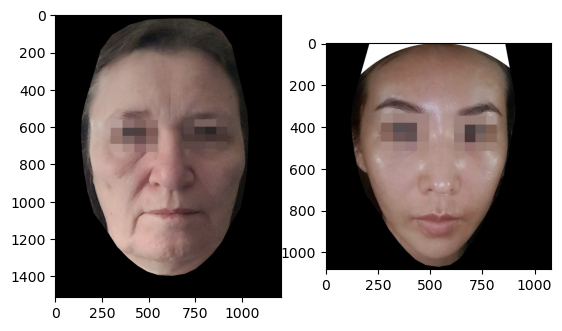

In [43]:
fig, axs = plt.subplots(1,2)

img1 = plt.imread(latest_selfie_paths_sample[0])
img2 = plt.imread(latest_selfie_paths_sample[5])

axs[0].imshow(img1)
axs[1].imshow(img2)

plt.show()

## Idea 2: Bounding Box Analysis:
Extract the bounding box coordinates of the detected faces.
Analyze the coordinates to check if the entire face is within the image boundaries.
Ensure that key facial features like eyes, nose, and mouth are contained within the bounding box.

## Idea 3: Facial Landmark Detection:
Utilize facial landmark detection to identify specific points on the face.
Check the alignment of facial landmarks to ensure that the face is centered and not cut off.